In [145]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal
import imageio
from scipy.stats import multivariate_normal

%matplotlib inline

'''
Simulate function
Description: Simulate the Gray-Scott model for numIter iterations.
Inputs:
    - numIter:  number of iterations
    - A:        prey matrix
    - B:        predator matrix
    - f:        feed rate
    - k:        kill rate
    - dt:       time constant
    - dA:       prey diffusion constant
    - dB:       predator diffusion constant
    - lapl:     3 x 3 Laplacian matrix to calculate diffusion

Outputs:
    - A_matrices:   Prey matrices over the course of the simulation
    - B_matrices:   Predator matrices over the course of the simulation
'''

'\nSimulate function\nDescription: Simulate the Gray-Scott model for numIter iterations.\nInputs:\n    - numIter:  number of iterations\n    - A:        prey matrix\n    - B:        predator matrix\n    - f:        feed rate\n    - k:        kill rate\n    - dt:       time constant\n    - dA:       prey diffusion constant\n    - dB:       predator diffusion constant\n    - lapl:     3 x 3 Laplacian matrix to calculate diffusion\n\nOutputs:\n    - A_matrices:   Prey matrices over the course of the simulation\n    - B_matrices:   Predator matrices over the course of the simulation\n'

In [146]:
x_start = .02
x_end = .08
y_start = .04
y_end = .1

In [147]:
images = []
def Simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter):
    print("Running Simulation")
    start = time.time()

    # Run the simulation
    for iter in range(numIter):
        A_new = A + (dA * signal.convolve2d(A, lapl, mode='same', boundary='fill', fillvalue=0) - (A * B * B) + (f * (1-A))) * dt
        B_new = B + (dB * signal.convolve2d(B, lapl, mode='same', boundary='fill', fillvalue=0) + (A * B * B) - ((k+f) * B)) * dt
        A = np.copy(A_new)
        B = np.copy(B_new)
        if (iter % plot_iter is 0):
            plt.clf()
            plt.imshow((B / (A+B)),cmap='Spectral',extent=[x_start,x_end,y_start,y_end])
            plt.axis('on')
            now = time.time()
            print("Mean time per epoch =" + str((now-start)/(iter+1)),end="\r")
            filename = 'gs_images/gs_'+str(iter)+'.png'
            plt.savefig(filename)
            images.append(imageio.imread(filename))

    return A, B

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Mohamed Amine\AppData\Local\Temp\ipykernel_22924\2285783643.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (iter % plot_iter is 0):


In [148]:
# _*_*_*_*_*_*_*_*_* GRID PROPERTIES *_*_*_*_*_*_*_*_*_*
grid_size = 1
grid_size_x = x_end-x_start
grid_size_y = y_end-y_start


grid_resolution = 512
numIter = 10000
seed_size = .0001 

# Create a 2D Gaussian distribution
seed = 1000
center = [(x_start+np.random.random()*grid_size_x,y_start+np.random.random()*grid_size_y) for i in range(seed)]

# Generate the 2D Gaussian grid
# x, y = np.meshgrid(np.linspace(0, grid_size, grid_resolution ), np.linspace(0, grid_size, grid_resolution))
x, y = np.meshgrid(np.linspace(x_start, x_end, grid_resolution ), np.linspace(y_start, y_end, grid_resolution))

A = np.ones_like(x)
B = np.zeros_like(x)

for i in range(seed):
    B = B + np.exp(-((x-center[i][0])**2+(y-center[i][1])**2)/seed_size**2)


# Normalize the Gaussian grid to have values between 0 and 1
B = B / np.max(B)


In [149]:
# _*_*_*_*_*_*_*_*_* SIMULATION VARIABLES *_*_*_*_*_*_*_*_*_*
k=.06349   
f=.03209

k=x
f=y

dt = .5
dA = 1.0
dB = 0.5
lapl = np.array([[0.05, 0.2, 0.05],[0.2, -1.0, 0.2],[0.05, 0.2, 0.05]])
plot_iter = 50

Running Simulation


C:\Users\Mohamed Amine\AppData\Local\Temp\ipykernel_22924\2285783643.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


C:\Users\Mohamed Amine\AppData\Local\Temp\ipykernel_22924\2285783643.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (iter % plot_iter is 0):
C:\Users\Mohamed Amine\AppData\Local\Temp\ipykernel_22924\2285783643.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (iter % plot_iter is 0):


KeyboardInterrupt: 

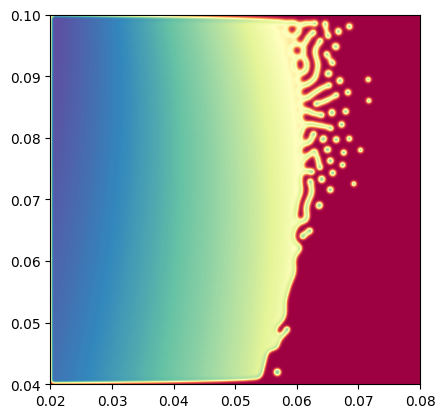

In [150]:
A,B = Simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter)


In [ ]:
imageio.mimsave('gs_images/gs_movie.gif', images)